# Îâ¥Ïä§ Ï∂îÏ≤ú ÏãúÏä§ÌÖú Ï†êÏàòÌôî EDA (news + toon ÌÜµÌï©)

**ÏùòÎèÑÏ†Å ÌñâÎèô Í∏∞Î∞ò Ï†êÏàò Ï≤¥Í≥Ñ ÏÑ§Í≥Ñ**  
ÏÇ¨Ïö©ÏûêÏùò ÏùòÎèÑÏ†Å ÌñâÎèô Îç∞Ïù¥ÌÑ∞ÎßåÏùÑ Î∂ÑÏÑùÌïòÏó¨ NewsÏôÄ Toon ÏΩòÌÖêÏ∏†Ïóê ÎåÄÌïú Í∞Å Ïù¥Î≤§Ìä∏Ïùò ÏÉÅÎåÄÏ†Å Ï§ëÏöîÎèÑÏôÄ ÏÑ†Ìò∏ÎèÑÎ•º Í∞ùÍ¥ÄÏ†ÅÏúºÎ°ú ÎèÑÏ∂úÌïòÍ≥†, Ïù¥Î•º Î∞îÌÉïÏúºÎ°ú ÏµúÏ†ÅÏùò Ï†êÏàò Ï≤¥Í≥ÑÎ•º Ï†úÏïàÌï©ÎãàÎã§.

## Î∂ÑÏÑù Î™©Ìëú
1. News + Toon Ïù¥Î≤§Ìä∏Î≥Ñ ÏÇ¨Ïö©Ïûê Ï∞∏Ïó¨ÎèÑÏôÄ ÏÑ†Ìò∏ÎèÑ Ï†ïÎüâÌôî
2. ÏΩòÌÖêÏ∏† Ïú†ÌòïÎ≥Ñ ÏÇ¨Ïö©Ïûê ÌñâÎèô Ìå®ÌÑ¥ Î∂ÑÏÑù
3. ÌñâÎèô ÏãúÌÄÄÏä§ Ìå®ÌÑ¥ Î∂ÑÏÑùÏùÑ ÌÜµÌïú Í∞ÄÏ§ëÏπò ÎèÑÏ∂ú
4. ÌÜµÍ≥ÑÏ†Å Î∞©Î≤ïÎ°† Í∏∞Î∞òÏùò ÌÜµÌï© Ï†êÏàò Ï≤¥Í≥Ñ ÏÑ§Í≥Ñ

## Ìè¨Ìï®/Ï†úÏô∏ Ïù¥Î≤§Ìä∏
### ‚úÖ Ìè¨Ìï® (ÏùòÎèÑÏ†Å ÌñâÎèô)
- **News**: `news_click`, `news_view_end`, `news_bookmark`
- **Toon**: `toon_positive`, `toon_negative`, `toon_click`, `toon_expand_news`, `toon_impression`

### ‚ùå Ï†úÏô∏ (Î∂àÎ™ÖÌôïÌïòÍ±∞ÎÇò ÎÖ∏Ïù¥Ï¶à)
- `news_impression`: CTR Í≥ÑÏÇ∞Ïö©, Îã®Ïàú ÎÖ∏Ï∂úÏùÄ ÏùòÎèÑÏôÄ Î¨¥Í¥Ä
- `news_view_start`: ÏãúÏûëÎßåÏúºÎ°úÎäî Ïã§Ï†ú Í¥ÄÏã¨ÎèÑ Î∂àÎ™ÖÌôï

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

# Ïä§ÌÉÄÏùº ÏÑ§Ï†ï
sns.set_style("whitegrid")
plt.style.use('default')

## 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Í∏∞Î≥∏ Ï†ïÎ≥¥

In [16]:
# CSV ÌååÏùº Î°úÎìú (ÏµúÏã† ÎÇ†Ïßú)
df_raw = pd.read_csv('data/events_20250911.csv')

# Ï∂îÏ≤ú ÏãúÏä§ÌÖúÏóê Ï†ÅÌï©Ìïú Ïù¥Î≤§Ìä∏Îßå ÌïÑÌÑ∞ÎßÅ
# Ï†úÏô∏: news_impression (Îã®Ïàú ÎÖ∏Ï∂ú), news_view_start (ÏãúÏûëÎßåÏúºÎ°úÎäî ÏùòÎèÑ Î∂àÎ™ÖÌôï)
# Ìè¨Ìï®: Ïã§Ï†ú ÏÇ¨Ïö©Ïûê ÏùòÎèÑÍ∞Ä Î™ÖÌôïÌïú ÌñâÎèôÎì§ + toon Í¥ÄÎ†® Ïù¥Î≤§Ìä∏Îì§
relevant_events = [
    'news_click', 'news_view_end', 'news_bookmark',  # Îâ¥Ïä§ Í¥ÄÎ†® ÏùòÎèÑÏ†Å ÌñâÎèô
    'toon_positive', 'toon_negative', 'toon_click',   # Ìà∞ Í¥ÄÎ†® Î™ÖÌôïÌïú Î∞òÏùë
    'toon_expand_news', 'toon_impression'             # Ìà∞ Í¥ÄÎ†® Ï∂îÍ∞Ä ÌñâÎèô
]

df = df_raw[df_raw['event_name'].isin(relevant_events)].copy()

print(f"Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {df_raw.shape}")
print(f"ÌïÑÌÑ∞ÎßÅ ÌõÑ: {df.shape}")
print(f"Ï†úÏô∏Îêú Ïù¥Î≤§Ìä∏ Ïàò: {len(df_raw) - len(df):,}Í∞ú")
print(f"Ìè¨Ìï®Îêú Ïù¥Î≤§Ìä∏ ÌÉÄÏûÖ: {sorted(df['event_name'].unique())}")
print(f"Ïª¨Îüº: {list(df.columns)}")
print(f"\nÎç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ:")
print(df.dtypes)

# Í∏∞Î≥∏ ÌÜµÍ≥Ñ
print(f"\n=== Í∏∞Î≥∏ ÌÜµÍ≥Ñ (ÏùòÎèÑÏ†Å ÌñâÎèôÎßå) ===")
print(f"Ï¥ù Ïù¥Î≤§Ìä∏ Ïàò: {len(df):,}")
print(f"Ïú†ÎãàÌÅ¨ ÏÇ¨Ïö©Ïûê Ïàò: {df['user_id'].nunique():,}")
print(f"Ïú†ÎãàÌÅ¨ Îâ¥Ïä§ Ïàò: {df['news_id'].nunique():,}")
print(f"Ïù¥Î≤§Ìä∏ Ï¢ÖÎ•ò: {df['event_name'].nunique()}Í∞ú")

Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (1000000, 9)
ÌïÑÌÑ∞ÎßÅ ÌõÑ: (1000000, 9)
Ï†úÏô∏Îêú Ïù¥Î≤§Ìä∏ Ïàò: 0Í∞ú
Ìè¨Ìï®Îêú Ïù¥Î≤§Ìä∏ ÌÉÄÏûÖ: ['news_bookmark', 'news_click', 'news_view_end', 'toon_click', 'toon_expand_news', 'toon_impression', 'toon_negative', 'toon_positive']
Ïª¨Îüº: ['user_id', 'news_id', 'event_name', 'ts', 'dwell_ms', 'scroll_pct', 'action', 'feed_source', 'from_source']

Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ:
user_id          int64
news_id          int64
event_name      object
ts              object
dwell_ms       float64
scroll_pct     float64
action          object
feed_source     object
from_source     object
dtype: object

=== Í∏∞Î≥∏ ÌÜµÍ≥Ñ (ÏùòÎèÑÏ†Å ÌñâÎèôÎßå) ===
Ï¥ù Ïù¥Î≤§Ìä∏ Ïàò: 1,000,000
Ïú†ÎãàÌÅ¨ ÏÇ¨Ïö©Ïûê Ïàò: 50,000
Ïú†ÎãàÌÅ¨ Îâ¥Ïä§ Ïàò: 254,890
Ïù¥Î≤§Ìä∏ Ï¢ÖÎ•ò: 8Í∞ú


In [17]:
# Îç∞Ïù¥ÌÑ∞ ÎØ∏Î¶¨Î≥¥Í∏∞
df.head(10)

user_id  news_id     event_name                         ts  dwell_ms  \
0     5863   120944  news_bookmark  2025-09-10 15:00:00+00:00       NaN   
1    41880    51937  news_bookmark  2025-09-10 15:00:00+00:00       NaN   
2    37081   200373     news_click  2025-09-10 15:00:00+00:00       NaN   
3     7373    32666     news_click  2025-09-10 15:00:00+00:00       NaN   
4    45057    52194     news_click  2025-09-10 15:00:00+00:00       NaN   
5     3135   105678     news_click  2025-09-10 15:00:00+00:00       NaN   
6     1948    26813     news_click  2025-09-10 15:00:00+00:00       NaN   
7    47612     7832     news_click  2025-09-10 15:00:00+00:00       NaN   
8    12310    31548     news_click  2025-09-10 15:00:00+00:00       NaN   
9     3150   553299     toon_click  2025-09-10 15:00:01+00:00       NaN   

   scroll_pct action feed_source from_source  
0         NaN    add         NaN         NaN  
1         NaN    add         NaN         NaN  
2         NaN    NaN    category    category  
3         NaN    NaN    category    category  
4         NaN    NaN   recommend   recommend  
5         NaN    NaN      search      search  
6         NaN    NaN       today       today  
7         NaN    NaN       today       today  
8         NaN    NaN    trending    trending  
9         NaN    NaN         NaN         NaN

## 2. Ïù¥Î≤§Ìä∏Î≥Ñ Î∂ÑÌè¨ Î∂ÑÏÑù

=== Ïù¥Î≤§Ìä∏Î≥Ñ ÎπàÎèÑ ===
news_click: 400,000 (40.0%)
news_view_end: 400,000 (40.0%)
news_bookmark: 100,000 (10.0%)
toon_positive: 32,787 (3.3%)
toon_impression: 20,120 (2.0%)
toon_expand_news: 19,365 (1.9%)
toon_negative: 14,390 (1.4%)
toon_click: 13,338 (1.3%)


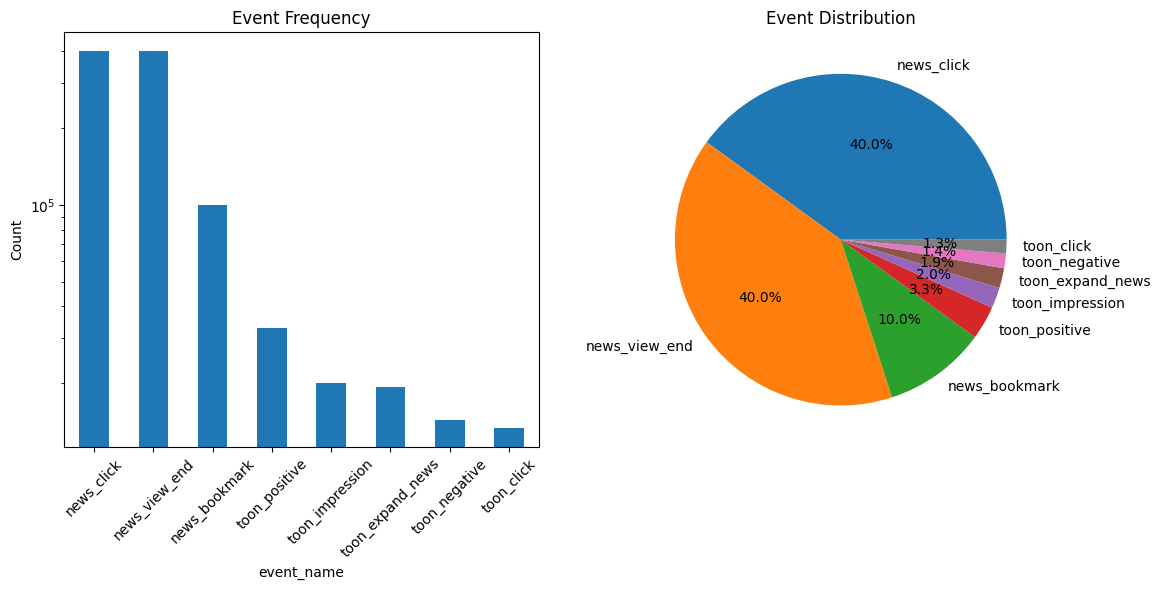

In [18]:
# Ïù¥Î≤§Ìä∏Î≥Ñ ÎπàÎèÑ
event_counts = df['event_name'].value_counts()
print("=== Ïù¥Î≤§Ìä∏Î≥Ñ ÎπàÎèÑ ===")
for event, count in event_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{event}: {count:,} ({percentage:.1f}%)")

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
event_counts.plot(kind='bar', rot=45)
plt.title('Event Frequency')
plt.ylabel('Count')
plt.yscale('log')  # Î°úÍ∑∏ Ïä§ÏºÄÏùºÎ°ú Ï∞®Ïù¥Î•º Î™ÖÌôïÌûà

plt.subplot(1, 2, 2)
event_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Event Distribution')
plt.ylabel('')

plt.tight_layout()
plt.show()

## 3. ÏÇ¨Ïö©Ïûê ÌñâÎèô Ìå®ÌÑ¥ Î∂ÑÏÑù

=== ÏÇ¨Ïö©ÏûêÎ≥Ñ Ïù¥Î≤§Ìä∏ Ïàò ÌÜµÍ≥Ñ ===
count    50000.000000
mean        20.000000
std          4.458304
min          5.000000
25%         17.000000
50%         20.000000
75%         23.000000
max         42.000000
dtype: float64


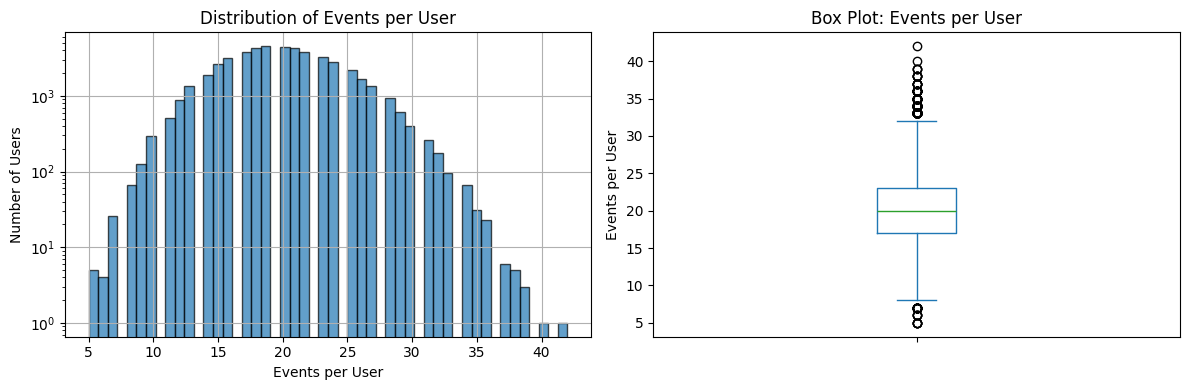


=== ÏÇ¨Ïö©Ïûê ÌôúÎèô ÏÑ∏Î∂ÑÌôî ===
Í≥†ÌôúÏÑ± ÏÇ¨Ïö©Ïûê (ÏÉÅÏúÑ 20%): 24+ Ïù¥Î≤§Ìä∏
Ï†ÄÌôúÏÑ± ÏÇ¨Ïö©Ïûê (ÌïòÏúÑ 20%): 16- Ïù¥Î≤§Ìä∏


In [19]:
# ÏÇ¨Ïö©ÏûêÎ≥Ñ Ïù¥Î≤§Ìä∏ Ïàò Î∂ÑÌè¨
user_event_counts = df.groupby('user_id').size()

print(f"=== ÏÇ¨Ïö©ÏûêÎ≥Ñ Ïù¥Î≤§Ìä∏ Ïàò ÌÜµÍ≥Ñ ===")
print(user_event_counts.describe())

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
user_event_counts.hist(bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Events per User')
plt.ylabel('Number of Users')
plt.title('Distribution of Events per User')
plt.yscale('log')

plt.subplot(1, 2, 2)
user_event_counts.plot(kind='box')
plt.ylabel('Events per User')
plt.title('Box Plot: Events per User')

plt.tight_layout()
plt.show()

# ÌôúÏÑ± ÏÇ¨Ïö©Ïûê vs ÎπÑÌôúÏÑ± ÏÇ¨Ïö©Ïûê
high_activity_threshold = user_event_counts.quantile(0.8)
low_activity_threshold = user_event_counts.quantile(0.2)

print(f"\n=== ÏÇ¨Ïö©Ïûê ÌôúÎèô ÏÑ∏Î∂ÑÌôî ===")
print(f"Í≥†ÌôúÏÑ± ÏÇ¨Ïö©Ïûê (ÏÉÅÏúÑ 20%): {high_activity_threshold:.0f}+ Ïù¥Î≤§Ìä∏")
print(f"Ï†ÄÌôúÏÑ± ÏÇ¨Ïö©Ïûê (ÌïòÏúÑ 20%): {low_activity_threshold:.0f}- Ïù¥Î≤§Ìä∏")

## 4. Ïù¥Î≤§Ìä∏Î≥Ñ ÏÇ¨Ïö©Ïûê Ï∞∏Ïó¨ÎèÑ Î∂ÑÏÑù

In [20]:
# Ïù¥Î≤§Ìä∏Î≥Ñ ÏÇ¨Ïö©Ïûê Ï∞∏Ïó¨ ÏßÄÌëú Í≥ÑÏÇ∞
event_metrics = {}

for event in df['event_name'].unique():
    event_df = df[df['event_name'] == event]
    
    metrics = {
        'count': len(event_df),
        'unique_users': event_df['user_id'].nunique(),
        'unique_news': event_df['news_id'].nunique(),
        'user_penetration': event_df['user_id'].nunique() / df['user_id'].nunique(),
        'avg_per_user': len(event_df) / event_df['user_id'].nunique() if event_df['user_id'].nunique() > 0 else 0,
        'frequency_score': len(event_df) / len(df)  # Ï†ÑÏ≤¥ ÎåÄÎπÑ ÎπàÎèÑ
    }
    
    # Î∞òÎ≥µ ÌñâÎèô Î∂ÑÏÑù (Í∞ôÏùÄ ÏÇ¨Ïö©ÏûêÍ∞Ä Í∞ôÏùÄ Îâ¥Ïä§Ïóê ÎåÄÌï¥ Î∞òÎ≥µÌïòÎäî Ï†ïÎèÑ)
    repeated_actions = event_df.groupby(['user_id', 'news_id']).size()
    metrics['repeat_rate'] = (repeated_actions > 1).mean()
    
    event_metrics[event] = metrics

# Í≤∞Í≥º Ï∂úÎ†•
print("=== Ïù¥Î≤§Ìä∏Î≥Ñ Ï∞∏Ïó¨ÎèÑ ÏßÄÌëú ===")
metrics_df = pd.DataFrame(event_metrics).T
for event, row in metrics_df.iterrows():
    print(f"\n{event}:")
    print(f"  Ï¥ù ÌöüÏàò: {row['count']:,}")
    print(f"  Ï∞∏Ïó¨ ÏÇ¨Ïö©Ïûê Ïàò: {row['unique_users']:,}")
    print(f"  ÏÇ¨Ïö©Ïûê Ïπ®Ìà¨Ïú®: {row['user_penetration']*100:.1f}%")
    print(f"  ÏÇ¨Ïö©ÏûêÎãπ ÌèâÍ∑†: {row['avg_per_user']:.1f}Ìöå")
    print(f"  Î∞òÎ≥µ ÌñâÎèôÎ•†: {row['repeat_rate']*100:.1f}%")

=== Ïù¥Î≤§Ìä∏Î≥Ñ Ï∞∏Ïó¨ÎèÑ ÏßÄÌëú ===

news_bookmark:
  Ï¥ù ÌöüÏàò: 100,000.0
  Ï∞∏Ïó¨ ÏÇ¨Ïö©Ïûê Ïàò: 43,290.0
  ÏÇ¨Ïö©Ïûê Ïπ®Ìà¨Ïú®: 86.6%
  ÏÇ¨Ïö©ÏûêÎãπ ÌèâÍ∑†: 2.3Ìöå
  Î∞òÎ≥µ ÌñâÎèôÎ•†: 0.0%

news_click:
  Ï¥ù ÌöüÏàò: 400,000.0
  Ï∞∏Ïó¨ ÏÇ¨Ïö©Ïûê Ïàò: 49,979.0
  ÏÇ¨Ïö©Ïûê Ïπ®Ìà¨Ïú®: 100.0%
  ÏÇ¨Ïö©ÏûêÎãπ ÌèâÍ∑†: 8.0Ìöå
  Î∞òÎ≥µ ÌñâÎèôÎ•†: 0.0%

toon_click:
  Ï¥ù ÌöüÏàò: 13,338.0
  Ï∞∏Ïó¨ ÏÇ¨Ïö©Ïûê Ïàò: 11,773.0
  ÏÇ¨Ïö©Ïûê Ïπ®Ìà¨Ïú®: 23.5%
  ÏÇ¨Ïö©ÏûêÎãπ ÌèâÍ∑†: 1.1Ìöå
  Î∞òÎ≥µ ÌñâÎèôÎ•†: 0.0%

toon_negative:
  Ï¥ù ÌöüÏàò: 14,390.0
  Ï∞∏Ïó¨ ÏÇ¨Ïö©Ïûê Ïàò: 12,498.0
  ÏÇ¨Ïö©Ïûê Ïπ®Ìà¨Ïú®: 25.0%
  ÏÇ¨Ïö©ÏûêÎãπ ÌèâÍ∑†: 1.2Ìöå
  Î∞òÎ≥µ ÌñâÎèôÎ•†: 0.0%

toon_impression:
  Ï¥ù ÌöüÏàò: 20,120.0
  Ï∞∏Ïó¨ ÏÇ¨Ïö©Ïûê Ïàò: 16,574.0
  ÏÇ¨Ïö©Ïûê Ïπ®Ìà¨Ïú®: 33.1%
  ÏÇ¨Ïö©ÏûêÎãπ ÌèâÍ∑†: 1.2Ìöå
  Î∞òÎ≥µ ÌñâÎèôÎ•†: 0.0%

toon_expand_news:
  Ï¥ù ÌöüÏàò: 19,365.0
  Ï∞∏Ïó¨ ÏÇ¨Ïö©Ïûê Ïàò: 16,038.0
  ÏÇ¨Ïö©Ïûê Ïπ®Ìà¨Ïú®: 32.1%
  ÏÇ¨Ïö©ÏûêÎãπ ÌèâÍ∑†: 1.2Ìöå
  Î∞òÎ≥µ ÌñâÎèôÎ•†: 0.0%

toon_positive:
  Ï¥ù Ìö

## 5. Ï≤¥Î•òÏãúÍ∞ÑÍ≥º Ïä§ÌÅ¨Î°§ ÎπÑÏú® Î∂ÑÏÑù

=== news_view_end Ïù¥Î≤§Ìä∏ Î∂ÑÏÑù (400,000Í∞ú) ===
Ï≤¥Î•òÏãúÍ∞Ñ ÌÜµÍ≥Ñ (ms):
count    400000.000000
mean      49948.554285
std       18961.048262
min       10578.000000
25%       36480.000000
50%       43731.000000
75%       63927.000000
max       90999.000000
Name: dwell_ms, dtype: float64

Ïä§ÌÅ¨Î°§ ÎπÑÏú® ÌÜµÍ≥Ñ (%):
count    400000.000000
mean         72.884255
std          23.104209
min          13.000000
25%          54.000000
50%          73.000000
75%         100.000000
max         100.000000
Name: scroll_pct, dtype: float64

=== ÌòÑÏû¨ Í∏∞Ï§ÄÏ†ê Î∂ÑÏÑù ===
15Ï¥à Ïù¥ÏÉÅ Ï≤¥Î•ò: 396,898 (99.2%)
70% Ïù¥ÏÉÅ Ïä§ÌÅ¨Î°§: 218,379 (54.6%)
Í≥†ÌíàÏßà ÏùΩÍ∏∞ (Îëò Ï§ë ÌïòÎÇò): 396,898 (99.2%)


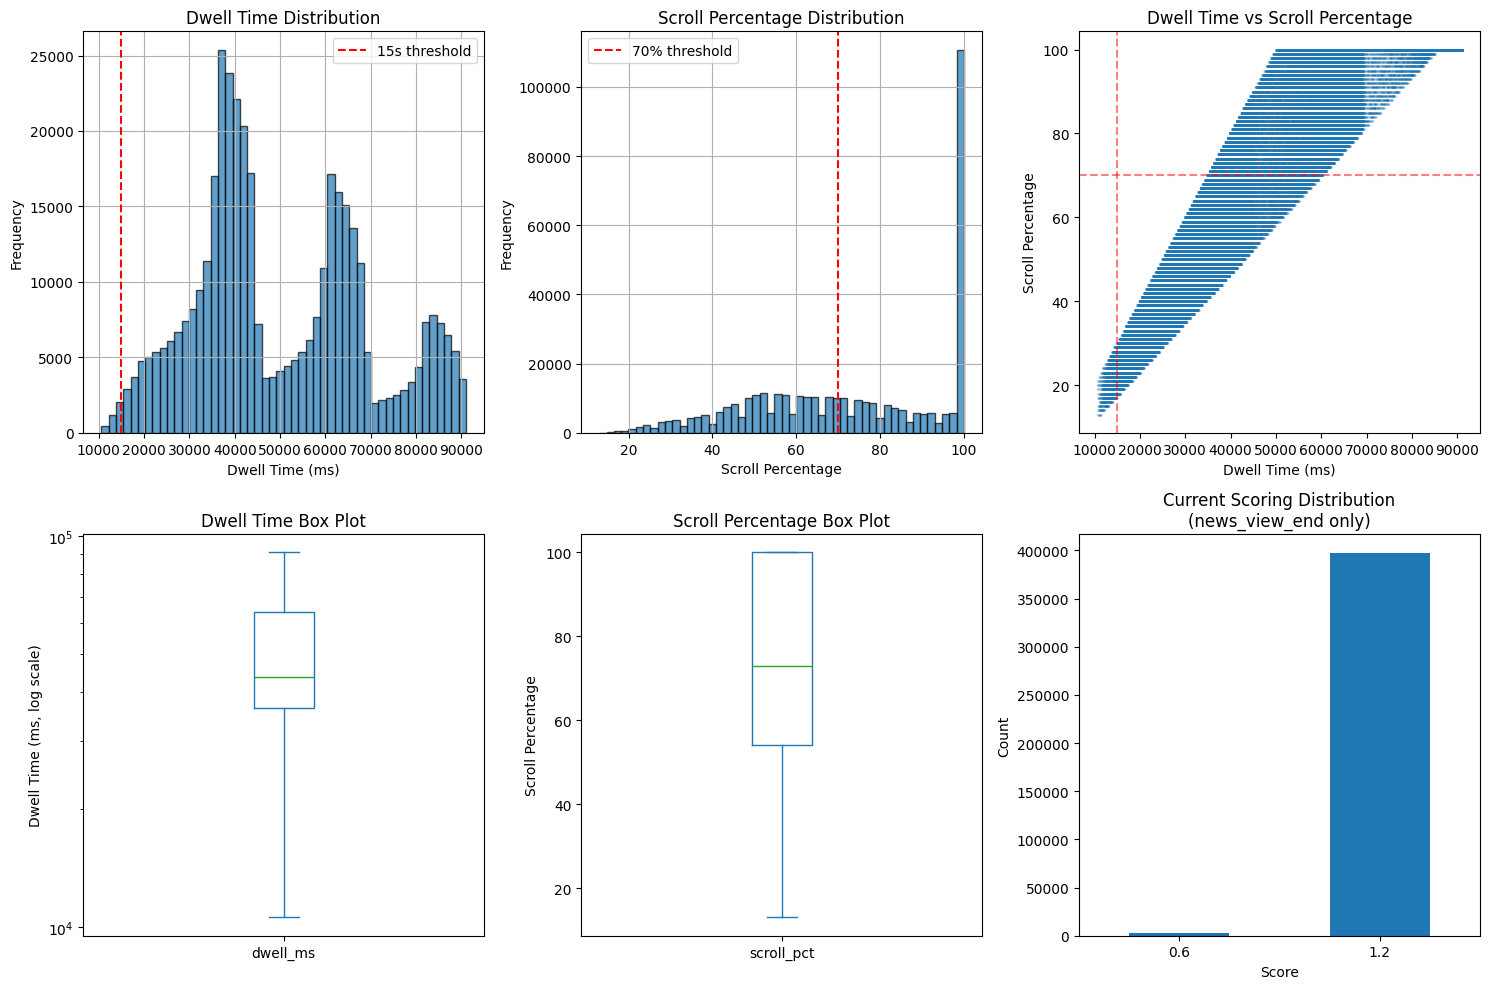

In [21]:
# news_view_end Ïù¥Î≤§Ìä∏Îßå Î∂ÑÏÑù
view_end_df = df[df['event_name'] == 'news_view_end'].copy()

# ÌòÑÏû¨ Ï†êÏàò Í≥ÑÏÇ∞ Ìï®Ïàò Ï†ïÏùò
def calculate_current_score(row):
    """ÌòÑÏû¨ train_cf.pyÏóêÏÑú ÏÇ¨Ïö©ÌïòÎäî Ï†êÏàò Í≥ÑÏÇ∞ Î°úÏßÅ"""
    if row['event_name'] == 'news_view_end':
        dwell_ms = row.get('dwell_ms', 0) or 0
        scroll_pct = row.get('scroll_pct', 0) or 0
        if dwell_ms >= 15000 or scroll_pct >= 70:
            return 1.2  # Í≥†ÌíàÏßà ÏùΩÍ∏∞
        else:
            return 0.6  # ÏùºÎ∞ò ÏùΩÍ∏∞
    return 0

if len(view_end_df) > 0:
    # Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
    view_end_df['dwell_ms'] = view_end_df['dwell_ms'].fillna(0)
    view_end_df['scroll_pct'] = view_end_df['scroll_pct'].fillna(0)
    
    print(f"=== news_view_end Ïù¥Î≤§Ìä∏ Î∂ÑÏÑù ({len(view_end_df):,}Í∞ú) ===")
    print(f"Ï≤¥Î•òÏãúÍ∞Ñ ÌÜµÍ≥Ñ (ms):")
    print(view_end_df['dwell_ms'].describe())
    print(f"\nÏä§ÌÅ¨Î°§ ÎπÑÏú® ÌÜµÍ≥Ñ (%):")
    print(view_end_df['scroll_pct'].describe())
    
    # ÌòÑÏû¨ Í∏∞Ï§Ä (15Ï¥à, 70%) Í≤ÄÏ¶ù
    high_dwell = (view_end_df['dwell_ms'] >= 15000).sum()
    high_scroll = (view_end_df['scroll_pct'] >= 70).sum()
    high_engagement = ((view_end_df['dwell_ms'] >= 15000) | (view_end_df['scroll_pct'] >= 70)).sum()
    
    print(f"\n=== ÌòÑÏû¨ Í∏∞Ï§ÄÏ†ê Î∂ÑÏÑù ===")
    print(f"15Ï¥à Ïù¥ÏÉÅ Ï≤¥Î•ò: {high_dwell:,} ({high_dwell/len(view_end_df)*100:.1f}%)")
    print(f"70% Ïù¥ÏÉÅ Ïä§ÌÅ¨Î°§: {high_scroll:,} ({high_scroll/len(view_end_df)*100:.1f}%)")
    print(f"Í≥†ÌíàÏßà ÏùΩÍ∏∞ (Îëò Ï§ë ÌïòÎÇò): {high_engagement:,} ({high_engagement/len(view_end_df)*100:.1f}%)")
    
    # ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(15, 10))
    
    # Ï≤¥Î•òÏãúÍ∞Ñ Î∂ÑÌè¨
    plt.subplot(2, 3, 1)
    view_end_df['dwell_ms'].hist(bins=50, edgecolor='black', alpha=0.7)
    plt.axvline(15000, color='red', linestyle='--', label='15s threshold')
    plt.xlabel('Dwell Time (ms)')
    plt.ylabel('Frequency')
    plt.title('Dwell Time Distribution')
    plt.legend()
    
    # Ïä§ÌÅ¨Î°§ ÎπÑÏú® Î∂ÑÌè¨
    plt.subplot(2, 3, 2)
    view_end_df['scroll_pct'].hist(bins=50, edgecolor='black', alpha=0.7)
    plt.axvline(70, color='red', linestyle='--', label='70% threshold')
    plt.xlabel('Scroll Percentage')
    plt.ylabel('Frequency')
    plt.title('Scroll Percentage Distribution')
    plt.legend()
    
    # Ï≤¥Î•òÏãúÍ∞Ñ vs Ïä§ÌÅ¨Î°§ Í¥ÄÍ≥Ñ
    plt.subplot(2, 3, 3)
    plt.scatter(view_end_df['dwell_ms'], view_end_df['scroll_pct'], alpha=0.1, s=1)
    plt.axvline(15000, color='red', linestyle='--', alpha=0.5)
    plt.axhline(70, color='red', linestyle='--', alpha=0.5)
    plt.xlabel('Dwell Time (ms)')
    plt.ylabel('Scroll Percentage')
    plt.title('Dwell Time vs Scroll Percentage')
    
    # Ï≤¥Î•òÏãúÍ∞Ñ Î∞ïÏä§ÌîåÎ°Ø (Î°úÍ∑∏Ïä§ÏºÄÏùº)
    plt.subplot(2, 3, 4)
    view_end_df[view_end_df['dwell_ms'] > 0]['dwell_ms'].plot(kind='box')
    plt.yscale('log')
    plt.ylabel('Dwell Time (ms, log scale)')
    plt.title('Dwell Time Box Plot')
    
    # Ïä§ÌÅ¨Î°§ ÎπÑÏú® Î∞ïÏä§ÌîåÎ°Ø
    plt.subplot(2, 3, 5)
    view_end_df['scroll_pct'].plot(kind='box')
    plt.ylabel('Scroll Percentage')
    plt.title('Scroll Percentage Box Plot')
    
    # Ï†êÏàò Î∂ÑÌè¨ (ÌòÑÏû¨ Í∏∞Ï§Ä)
    plt.subplot(2, 3, 6)
    view_end_scored = view_end_df.apply(calculate_current_score, axis=1)
    view_end_scored.value_counts().sort_index().plot(kind='bar')
    plt.xlabel('Score')
    plt.ylabel('Count')
    plt.title('Current Scoring Distribution\n(news_view_end only)')
    plt.xticks(rotation=0)
    
    plt.tight_layout()
    plt.show()
else:
    print("news_view_end Ïù¥Î≤§Ìä∏Í∞Ä ÏóÜÏäµÎãàÎã§.")

## 6. Î∂ÅÎßàÌÅ¨ ÌñâÎèô Î∂ÑÏÑù

=== Î∂ÅÎßàÌÅ¨ Ïù¥Î≤§Ìä∏ Î∂ÑÏÑù (100,000Í∞ú) ===
Ïï°ÏÖòÎ≥Ñ Î∂ÑÌè¨:
  add: 84,890 (84.9%)
  remove: 15,110 (15.1%)

Î∂ÅÎßàÌÅ¨ Ï∂îÍ∞Ä/Ï†úÍ±∞ ÎπÑÏú®: 84,890 / 15,110
Î∂ÅÎßàÌÅ¨ Ïú†ÏßÄÏú®: 82.2%

ÏÇ¨Ïö©ÏûêÎ≥Ñ Î∂ÅÎßàÌÅ¨ Ïàò ÌÜµÍ≥Ñ:
count    40849.000000
mean         2.078141
std          1.133070
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         10.000000
dtype: float64


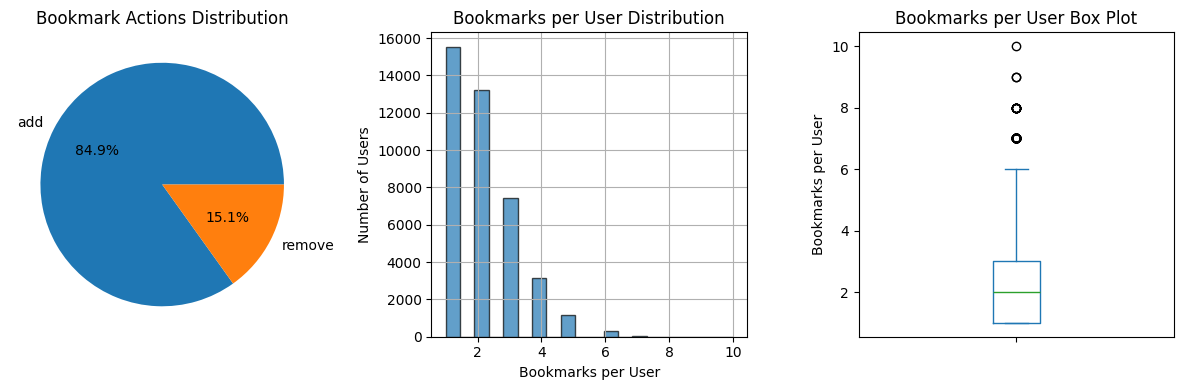

In [22]:
# Î∂ÅÎßàÌÅ¨ Ïù¥Î≤§Ìä∏ Î∂ÑÏÑù
bookmark_df = df[df['event_name'] == 'news_bookmark'].copy()

if len(bookmark_df) > 0:
    print(f"=== Î∂ÅÎßàÌÅ¨ Ïù¥Î≤§Ìä∏ Î∂ÑÏÑù ({len(bookmark_df):,}Í∞ú) ===")
    
    # actionÎ≥Ñ Î∂ÑÌè¨
    action_counts = bookmark_df['action'].value_counts()
    print(f"Ïï°ÏÖòÎ≥Ñ Î∂ÑÌè¨:")
    for action, count in action_counts.items():
        print(f"  {action}: {count:,} ({count/len(bookmark_df)*100:.1f}%)")
    
    # Î∂ÅÎßàÌÅ¨ Ï∂îÍ∞Ä vs Ï†úÍ±∞ ÎπÑÏú®
    add_count = action_counts.get('add', 0)
    remove_count = action_counts.get('remove', 0)
    
    print(f"\nÎ∂ÅÎßàÌÅ¨ Ï∂îÍ∞Ä/Ï†úÍ±∞ ÎπÑÏú®: {add_count:,} / {remove_count:,}")
    if remove_count > 0:
        retention_rate = (add_count - remove_count) / add_count * 100
        print(f"Î∂ÅÎßàÌÅ¨ Ïú†ÏßÄÏú®: {retention_rate:.1f}%")
    
    # ÏÇ¨Ïö©ÏûêÎ≥Ñ Î∂ÅÎßàÌÅ¨ Ïàò
    user_bookmark_counts = bookmark_df[bookmark_df['action'] == 'add'].groupby('user_id').size()
    print(f"\nÏÇ¨Ïö©ÏûêÎ≥Ñ Î∂ÅÎßàÌÅ¨ Ïàò ÌÜµÍ≥Ñ:")
    print(user_bookmark_counts.describe())
    
    # ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 3, 1)
    action_counts.plot(kind='pie', autopct='%1.1f%%')
    plt.title('Bookmark Actions Distribution')
    plt.ylabel('')
    
    plt.subplot(1, 3, 2)
    if len(user_bookmark_counts) > 0:
        user_bookmark_counts.hist(bins=20, edgecolor='black', alpha=0.7)
        plt.xlabel('Bookmarks per User')
        plt.ylabel('Number of Users')
        plt.title('Bookmarks per User Distribution')
    
    plt.subplot(1, 3, 3)
    if len(user_bookmark_counts) > 0:
        user_bookmark_counts.plot(kind='box')
        plt.ylabel('Bookmarks per User')
        plt.title('Bookmarks per User Box Plot')
    
    plt.tight_layout()
    plt.show()
else:
    print("Î∂ÅÎßàÌÅ¨ Ïù¥Î≤§Ìä∏Í∞Ä ÏóÜÏäµÎãàÎã§.")

## 7. Ïù¥Î≤§Ìä∏ ÏãúÌÄÄÏä§ Î∂ÑÏÑù

=== ÌÅ¥Î¶≠-ÏùΩÍ∏∞ ÏôÑÎ£å ÏãúÌÄÄÏä§ Î∂ÑÏÑù (ÏÉòÌîå) ===
ÌÅ¥Î¶≠Ìïú Îâ¥Ïä§ Ïàò: 8,121
ÏùΩÍ∏∞ ÏôÑÎ£åÏú®: 0.0%


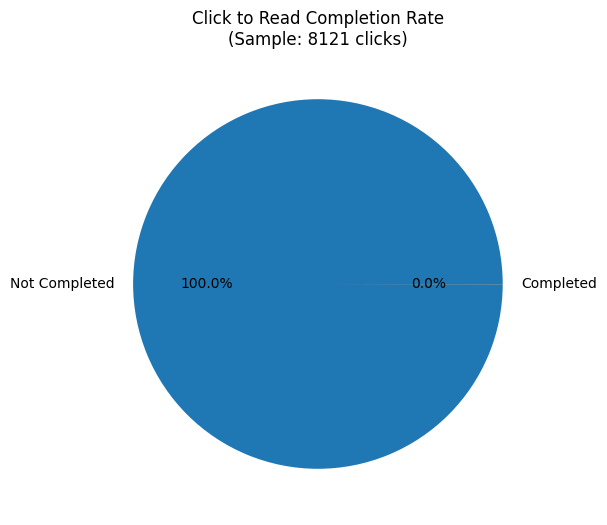


Î∂ÑÏÑù ÏùòÎØ∏: ÌÅ¥Î¶≠ Ïù¥Î≤§Ìä∏Ïùò 0.0%Îßå Ïã§Ï†ú ÏùΩÍ∏∞Î°ú Ïù¥Ïñ¥Ïßê
‚Üí ÌÅ¥Î¶≠ Ï†êÏàò(2.0)Í∞Ä ÎÑàÎ¨¥ ÎÜíÏùÑ Ïàò ÏûàÏùå


In [23]:
# ÏãúÍ∞ÑÏàúÏúºÎ°ú Ï†ïÎ†¨
df_sorted = df.sort_values(['user_id', 'ts']).copy()

# ÏÇ¨Ïö©Ïûê-Îâ¥Ïä§Î≥Ñ Ïù¥Î≤§Ìä∏ ÏãúÌÄÄÏä§ Î∂ÑÏÑù (ÏÉòÌîå)
sample_users = df_sorted['user_id'].unique()[:1000]  # Ï≤òÏùå 1000Î™ÖÎßå
sample_df = df_sorted[df_sorted['user_id'].isin(sample_users)].copy()

# ÌÅ¥Î¶≠ ÌõÑ ÏùΩÍ∏∞ ÏôÑÎ£å ÎπÑÏú®
click_to_view_sequences = []

for user_id in sample_users:
    user_events = sample_df[sample_df['user_id'] == user_id].copy()
    
    for news_id in user_events['news_id'].unique():
        news_events = user_events[user_events['news_id'] == news_id]['event_name'].tolist()
        
        # ÌÅ¥Î¶≠ ÌõÑ view_endÍ∞Ä ÏûàÎäîÏßÄ ÌôïÏù∏
        if 'news_click' in news_events:
            click_idx = news_events.index('news_click')
            has_view_end = 'news_view_end' in news_events[click_idx:]
            click_to_view_sequences.append({
                'user_id': user_id,
                'news_id': news_id,
                'clicked': True,
                'completed_reading': has_view_end
            })

if click_to_view_sequences:
    sequence_df = pd.DataFrame(click_to_view_sequences)
    completion_rate = sequence_df['completed_reading'].mean() * 100
    
    print(f"=== ÌÅ¥Î¶≠-ÏùΩÍ∏∞ ÏôÑÎ£å ÏãúÌÄÄÏä§ Î∂ÑÏÑù (ÏÉòÌîå) ===")
    print(f"ÌÅ¥Î¶≠Ìïú Îâ¥Ïä§ Ïàò: {len(sequence_df):,}")
    print(f"ÏùΩÍ∏∞ ÏôÑÎ£åÏú®: {completion_rate:.1f}%")
    
    # ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(8, 6))
    sequence_df['completed_reading'].value_counts().plot(kind='pie', 
                                                        labels=['Not Completed', 'Completed'],
                                                        autopct='%1.1f%%')
    plt.title(f'Click to Read Completion Rate\n(Sample: {len(sequence_df)} clicks)')
    plt.ylabel('')
    plt.show()
    
    print(f"\nÎ∂ÑÏÑù ÏùòÎØ∏: ÌÅ¥Î¶≠ Ïù¥Î≤§Ìä∏Ïùò {completion_rate:.1f}%Îßå Ïã§Ï†ú ÏùΩÍ∏∞Î°ú Ïù¥Ïñ¥Ïßê")
    if completion_rate < 50:
        print("‚Üí ÌÅ¥Î¶≠ Ï†êÏàò(2.0)Í∞Ä ÎÑàÎ¨¥ ÎÜíÏùÑ Ïàò ÏûàÏùå")
    else:
        print("‚Üí ÌÅ¥Î¶≠Ïù¥ Ïã§Ï†ú Í¥ÄÏã¨ÏùÑ Ïûò ÎÇòÌÉÄÎÉÑ")
else:
    print("ÌÅ¥Î¶≠-ÏùΩÍ∏∞ ÏãúÌÄÄÏä§Î•º Î∂ÑÏÑùÌï† Îç∞Ïù¥ÌÑ∞Í∞Ä Ï∂©Î∂ÑÌïòÏßÄ ÏïäÏäµÎãàÎã§.")

## 8. Îç∞Ïù¥ÌÑ∞ Í∏∞Î∞ò Ï†êÏàò Ï≤¥Í≥Ñ ÎèÑÏ∂ú

In [24]:
print("=== Îç∞Ïù¥ÌÑ∞ Í∏∞Î∞ò Ï†êÏàò Ï≤¥Í≥Ñ ÎèÑÏ∂ú (news + toon ÌÜµÌï©) ===")

# 1. Ïù¥Î≤§Ìä∏Î≥Ñ ÏÑ†Ìò∏ÎèÑ Í∞ïÎèÑ Í≥ÑÏÇ∞ (Ïó¨Îü¨ ÏßÄÌëúÏùò Ï¢ÖÌï©)
scoring_factors = {}

for event in event_metrics.keys():
    # ÌïÑÌÑ∞ÎßÅÎêú Ïù¥Î≤§Ìä∏Îßå Ï≤òÎ¶¨
    if event not in relevant_events:
        continue
        
    metrics = event_metrics[event]
    
    # Ï†ïÍ∑úÌôîÎêú ÏßÄÌëúÎì§ (0-1 Ïä§ÏºÄÏùº) - Í¥ÄÎ†® Ïù¥Î≤§Ìä∏Îì§ÎßåÏúºÎ°ú Ïû¨Í≥ÑÏÇ∞
    relevant_metrics = [event_metrics[k] for k in event_metrics.keys() if k in relevant_events]
    max_penetration = max([m['user_penetration'] for m in relevant_metrics])
    max_avg_per_user = max([m['avg_per_user'] for m in relevant_metrics])
    max_repeat_rate = max([m['repeat_rate'] for m in relevant_metrics])
    
    # Í∞ÄÏ§ë Ï†êÏàò Í≥ÑÏÇ∞
    preference_strength = (
        metrics['user_penetration'] / max_penetration * 0.4 +  # ÏÇ¨Ïö©Ïûê Ï∞∏Ïó¨ Î≤îÏúÑ
        (1 - metrics['frequency_score']) * 0.3 +  # Ìù¨ÏÜåÏÑ± (ÎÇÆÏùÄ ÎπàÎèÑ = ÎÜíÏùÄ ÏùòÎèÑÏÑ±)
        metrics['repeat_rate'] / max_repeat_rate * 0.3  # Î∞òÎ≥µ ÌñâÎèô (ÎÜíÏùÄ ÏùòÎèÑÏÑ±)
    )
    
    scoring_factors[event] = {
        'preference_strength': preference_strength,
        'rarity_bonus': 1 - metrics['frequency_score'],  # Ìù¨ÏÜåÏÑ± Î≥¥ÎÑàÏä§
        'engagement_depth': metrics['repeat_rate']  # Ï∞∏Ïó¨ ÍπäÏù¥
    }

# 2. ÌñâÎèô ÏãúÌÄÄÏä§ Í∏∞Î∞ò Í∞ÄÏ§ëÏπò Ï°∞Ï†ï (news + toon ÌÜµÌï©)
sequence_weights = {
    # News Ïù¥Î≤§Ìä∏
    'news_bookmark': 1.0,      # Î™ÖÌôïÌïú ÏÑ†Ìò∏ ÌëúÌòÑ (ÏµúÍ≥†)
    'news_view_end': 0.8,      # Ïã§Ï†ú ÏÜåÎπÑ ÏôÑÎ£å
    'news_click': 0.6,         # Ï¥àÍ∏∞ Í¥ÄÏã¨
    
    # Toon Ïù¥Î≤§Ìä∏ 
    'toon_positive': 0.7,      # Í∏çÏ†ï Î∞òÏùë (Î™ÖÌôïÌïú ÏÑ†Ìò∏)
    'toon_negative': 0.3,      # Î∂ÄÏ†ï Î∞òÏùë (ÎÇÆÏùÄ Ï†êÏàòÏßÄÎßå Ïã†Ìò∏Î°ú ÌôúÏö©)
    'toon_click': 0.5,         # Ìà∞ ÌÅ¥Î¶≠ (news_clickÎ≥¥Îã§ ÏïΩÍ∞Ñ ÎÇÆÏùå)
    'toon_expand_news': 0.6,   # Îâ¥Ïä§ ÌôïÏû• (Í¥ÄÏã¨ ÌëúÌòÑ)
    'toon_impression': 0.2,    # Ìà∞ ÎÖ∏Ï∂ú (news_impressionÎ≥¥Îã§Îäî ÏùòÎØ∏ÏûàÏùå)
}

# 3. ÏµúÏ¢Ö Ï†êÏàò Í≥ÑÏÇ∞ (news + toon ÌÜµÌï©)
final_scores = {}
max_base_score = 5.0  # ÏµúÍ≥†Ï†ê Í∏∞Ï§Ä

for event in scoring_factors.keys():
    if event in sequence_weights:
        # Îç∞Ïù¥ÌÑ∞ Í∏∞Î∞ò ÏÑ†Ìò∏ÎèÑ + ÌñâÎèô ÏãúÌÄÄÏä§ Í∞ÄÏ§ëÏπò
        combined_score = (
            scoring_factors[event]['preference_strength'] * 0.6 +
            sequence_weights[event] * 0.4
        ) * max_base_score
        
        final_scores[event] = round(combined_score, 1)

# 4. Ïù¥Î≤§Ìä∏ Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Ï†ïÎ¶¨
news_events = {k: v for k, v in final_scores.items() if k.startswith('news_')}
toon_events = {k: v for k, v in final_scores.items() if k.startswith('toon_')}

print(f"\n=== Ï†úÏïàÌïòÎäî Ï†êÏàò Ï≤¥Í≥Ñ (news + toon ÌÜµÌï©) ===")

print(f"\nüì∞ News Ïù¥Î≤§Ìä∏ Ï†êÏàò:")
for event, score in sorted(news_events.items(), key=lambda x: x[1], reverse=True):
    pref = scoring_factors[event]['preference_strength']
    print(f"  {event}: {score} (ÏÑ†Ìò∏ÎèÑ Í∞ïÎèÑ: {pref:.3f})")

print(f"\nüé® Toon Ïù¥Î≤§Ìä∏ Ï†êÏàò:")
for event, score in sorted(toon_events.items(), key=lambda x: x[1], reverse=True):
    pref = scoring_factors[event]['preference_strength']
    print(f"  {event}: {score} (ÏÑ†Ìò∏ÎèÑ Í∞ïÎèÑ: {pref:.3f})")

# 5. ÌäπÎ≥Ñ Ï≤òÎ¶¨: news_view_end ÌíàÏßà Íµ¨Î∂Ñ
if 'view_end_df' in locals() and len(view_end_df) > 0:
    dwell_75 = view_end_df[view_end_df['dwell_ms'] > 0]['dwell_ms'].quantile(0.75)
    scroll_75 = view_end_df[view_end_df['scroll_pct'] > 0]['scroll_pct'].quantile(0.75)
    
    high_quality_score = final_scores.get('news_view_end', 2.0) * 1.2
    low_quality_score = final_scores.get('news_view_end', 2.0) * 0.7
    
    print(f"\nüìñ ÏùΩÍ∏∞ ÌíàÏßàÎ≥Ñ Ï†êÏàò (news_view_end):")
    print(f"  Í≥†ÌíàÏßà ÏùΩÍ∏∞: {high_quality_score:.1f} (Ï≤¥Î•ò {dwell_75/1000:.1f}Ï¥à+ ÎòêÎäî Ïä§ÌÅ¨Î°§ {scroll_75:.0f}%+)")
    print(f"  ÏùºÎ∞ò ÏùΩÍ∏∞: {low_quality_score:.1f} (Í∑∏ Ïô∏)")

# 6. Ï†êÏàò Ï≤¥Í≥ÑÏùò ÎÖºÎ¶¨Ï†Å Í∑ºÍ±∞
print(f"\n=== Ï†êÏàò Ï≤¥Í≥Ñ ÏÑ§Í≥Ñ Í∑ºÍ±∞ ===")
print(f"1. ÏÇ¨Ïö©Ïûê Ï∞∏Ïó¨ÎèÑ (40%): ÏñºÎßàÎÇò ÎßéÏùÄ ÏÇ¨Ïö©ÏûêÍ∞Ä Ìï¥Îãπ ÌñâÎèôÏùÑ ÌïòÎäîÍ∞Ä")
print(f"2. Ìù¨ÏÜåÏÑ± (30%): ÏûêÏ£º ÏùºÏñ¥ÎÇòÏßÄ ÏïäÏùÑÏàòÎ°ù ÏùòÎèÑÏÑ±Ïù¥ ÎÜíÏùå")
print(f"3. Î∞òÎ≥µÏÑ± (30%): Í∞ôÏùÄ ÌñâÎèôÏùÑ Î∞òÎ≥µÌï†ÏàòÎ°ù Í∞ïÌïú ÏÑ†Ìò∏")
print(f"4. ÌñâÎèô ÏãúÌÄÄÏä§ Í∞ÄÏ§ëÏπò: ÏÇ¨Ïö©Ïûê Ïó¨Ï†ïÏóêÏÑúÏùò ÌñâÎèô Îã®Í≥ÑÎ≥Ñ Ï§ëÏöîÎèÑ")
print(f"5. News vs Toon: Ïª®ÌÖêÏ∏† Ïú†ÌòïÎ≥Ñ ÏÇ¨Ïö©Ïûê ÌñâÎèô Ìå®ÌÑ¥ Ï∞®Ïù¥ Î∞òÏòÅ")

print(f"\n=== Ï†úÏô∏Îêú Ïù¥Î≤§Ìä∏ÏôÄ Ïù¥Ïú† ===")
print(f"‚Ä¢ news_impression: Îã®Ïàú ÎÖ∏Ï∂ú, ÏÇ¨Ïö©Ïûê ÏùòÎèÑÏôÄ Î¨¥Í¥Ä")
print(f"‚Ä¢ news_view_start: ÏãúÏûëÎßåÏúºÎ°úÎäî Ïã§Ï†ú Í¥ÄÏã¨ Î∂àÎ™ÖÌôï")
print(f"‚Ä¢ Í∏∞ÌÉÄ ÎÖ∏Ï∂ú Í¥ÄÎ†® Ïù¥Î≤§Ìä∏: Ï∂îÏ≤ú Ï†êÏàòÏóê ÎÖ∏Ïù¥Ï¶àÍ∞Ä Îê† Í∞ÄÎä•ÏÑ±")

print(f"\n=== ÌòÑÏû¨ Î™®Îç∏Í≥ºÏùò ÎπÑÍµê ===")
print(f"ÌòÑÏû¨ train_cf.py Ï†êÏàò:")
print(f"  ‚Ä¢ news_bookmark (add): 3.0")
print(f"  ‚Ä¢ news_click: 2.0")
print(f"  ‚Ä¢ news_view_end (Í≥†ÌíàÏßà): 1.2")
print(f"  ‚Ä¢ news_view_end (ÏùºÎ∞ò): 0.6")
print(f"  ‚Ä¢ toon_expand_news: 1.0")
print(f"  ‚Ä¢ toon_positive: 0.8")
print(f"  ‚Ä¢ Í∏∞ÌÉÄ toon Ïù¥Î≤§Ìä∏: ÎØ∏Ìè¨Ìï®")

print(f"\n=== Í≤ÄÏ¶ù Î∞è Îã§Ïùå Îã®Í≥Ñ ===")
print(f"1. toon Ïù¥Î≤§Ìä∏Î•º Ìè¨Ìï®Ìïú Î™®Îç∏ Ïû¨ÌïôÏäµ")
print(f"2. news vs toon ÏΩòÌÖêÏ∏†Î≥Ñ Ï∂îÏ≤ú ÏÑ±Îä• ÎπÑÍµê")
print(f"3. Í∏çÏ†ï/Î∂ÄÏ†ï Î∞òÏùë Ïù¥Î≤§Ìä∏Ïùò Ìö®Í≥º Í≤ÄÏ¶ù")
print(f"4. ÏÇ¨Ïö©Ïûê ÏΩòÌÖêÏ∏† ÏÑ†Ìò∏ÎèÑ Îã§ÏñëÏÑ± Í∞úÏÑ† Ï∏°Ï†ï")

=== Îç∞Ïù¥ÌÑ∞ Í∏∞Î∞ò Ï†êÏàò Ï≤¥Í≥Ñ ÎèÑÏ∂ú (news + toon ÌÜµÌï©) ===

=== Ï†úÏïàÌïòÎäî Ï†êÏàò Ï≤¥Í≥Ñ (news + toon ÌÜµÌï©) ===

üì∞ News Ïù¥Î≤§Ìä∏ Ï†êÏàò:
  news_bookmark: 4.4 (ÏÑ†Ìò∏ÎèÑ Í∞ïÎèÑ: 0.801)
  news_view_end: 4.0 (ÏÑ†Ìò∏ÎèÑ Í∞ïÎèÑ: 0.788)
  news_click: 3.8 (ÏÑ†Ìò∏ÎèÑ Í∞ïÎèÑ: 0.880)

üé® Toon Ïù¥Î≤§Ìä∏ Ï†êÏàò:
  toon_positive: 2.8 (ÏÑ†Ìò∏ÎèÑ Í∞ïÎèÑ: 0.483)
  toon_expand_news: 2.5 (ÏÑ†Ìò∏ÎèÑ Í∞ïÎèÑ: 0.423)
  toon_click: 2.2 (ÏÑ†Ìò∏ÎèÑ Í∞ïÎèÑ: 0.390)
  toon_negative: 1.8 (ÏÑ†Ìò∏ÎèÑ Í∞ïÎèÑ: 0.396)
  toon_impression: 1.7 (ÏÑ†Ìò∏ÎèÑ Í∞ïÎèÑ: 0.427)

üìñ ÏùΩÍ∏∞ ÌíàÏßàÎ≥Ñ Ï†êÏàò (news_view_end):
  Í≥†ÌíàÏßà ÏùΩÍ∏∞: 4.8 (Ï≤¥Î•ò 63.9Ï¥à+ ÎòêÎäî Ïä§ÌÅ¨Î°§ 100%+)
  ÏùºÎ∞ò ÏùΩÍ∏∞: 2.8 (Í∑∏ Ïô∏)

=== Ï†êÏàò Ï≤¥Í≥Ñ ÏÑ§Í≥Ñ Í∑ºÍ±∞ ===
1. ÏÇ¨Ïö©Ïûê Ï∞∏Ïó¨ÎèÑ (40%): ÏñºÎßàÎÇò ÎßéÏùÄ ÏÇ¨Ïö©ÏûêÍ∞Ä Ìï¥Îãπ ÌñâÎèôÏùÑ ÌïòÎäîÍ∞Ä
2. Ìù¨ÏÜåÏÑ± (30%): ÏûêÏ£º ÏùºÏñ¥ÎÇòÏßÄ ÏïäÏùÑÏàòÎ°ù ÏùòÎèÑÏÑ±Ïù¥ ÎÜíÏùå
3. Î∞òÎ≥µÏÑ± (30%): Í∞ôÏùÄ ÌñâÎèôÏùÑ Î∞òÎ≥µÌï†ÏàòÎ°ù Í∞ïÌïú ÏÑ†Ìò∏
4. ÌñâÎèô ÏãúÌÄÄÏä§ Í∞ÄÏ§ëÏπò: ÏÇ¨Ïö

## 9. ÏöîÏïΩ Î∞è Í≤∞Î°†

In [25]:
print("=" * 60)
print("üìä Îç∞Ïù¥ÌÑ∞ Í∏∞Î∞ò Ï†êÏàò ÏÑ§Í≥Ñ Î¶¨Ìè¨Ìä∏ (news + toon ÌÜµÌï©)")
print("=" * 60)

print(f"\nüìà Îç∞Ïù¥ÌÑ∞ Í∞úÏöî:")
print(f"  ‚Ä¢ Ï†ÑÏ≤¥ Ïù¥Î≤§Ìä∏: {len(df_raw):,}Í∞ú")
print(f"  ‚Ä¢ Î∂ÑÏÑù ÎåÄÏÉÅ Ïù¥Î≤§Ìä∏: {len(df):,}Í∞ú")
print(f"  ‚Ä¢ Ï†úÏô∏Îêú Ïù¥Î≤§Ìä∏: {len(df_raw) - len(df):,}Í∞ú")
print(f"  ‚Ä¢ ÏÇ¨Ïö©Ïûê Ïàò: {df['user_id'].nunique():,}Î™Ö")
print(f"  ‚Ä¢ Îâ¥Ïä§ Ïàò: {df['news_id'].nunique():,}Í∞ú")
print(f"  ‚Ä¢ Ïù¥Î≤§Ìä∏ ÌÉÄÏûÖ: {len(event_counts)}Í∞ú")

print(f"\nüéØ ÌïµÏã¨ Ïù∏ÏÇ¨Ïù¥Ìä∏:")

# Ïù¥Î≤§Ìä∏ Î∂ÑÌè¨
top_event = event_counts.index[0]
top_event_pct = (event_counts.iloc[0] / len(df)) * 100
print(f"  ‚Ä¢ ÏµúÎπà Ïù¥Î≤§Ìä∏: {top_event} ({top_event_pct:.1f}%)")

# ÏÇ¨Ïö©Ïûê ÌôúÎèô
avg_events_per_user = user_event_counts.mean()
print(f"  ‚Ä¢ ÏÇ¨Ïö©ÏûêÎãπ ÌèâÍ∑† Ïù¥Î≤§Ìä∏: {avg_events_per_user:.1f}Í∞ú")

# News vs Toon Î∂ÑÌè¨
news_events_count = len(df[df['event_name'].str.startswith('news_')])
toon_events_count = len(df[df['event_name'].str.startswith('toon_')])
news_pct = (news_events_count / len(df)) * 100
toon_pct = (toon_events_count / len(df)) * 100

print(f"  ‚Ä¢ News Ïù¥Î≤§Ìä∏: {news_events_count:,}Í∞ú ({news_pct:.1f}%)")
print(f"  ‚Ä¢ Toon Ïù¥Î≤§Ìä∏: {toon_events_count:,}Í∞ú ({toon_pct:.1f}%)")

# ÏÑ†Ìò∏ÎèÑ Í∞ïÎèÑÍ∞Ä Í∞ÄÏû• ÎÜíÏùÄ Ïù¥Î≤§Ìä∏
if 'scoring_factors' in locals():
    top_preference = max(scoring_factors.items(), key=lambda x: x[1]['preference_strength'])
    print(f"  ‚Ä¢ ÏµúÍ≥† ÏÑ†Ìò∏ÎèÑ Ïù¥Î≤§Ìä∏: {top_preference[0]} (Í∞ïÎèÑ: {top_preference[1]['preference_strength']:.3f})")

# Ìù¨ÏÜåÏÑ±Ïù¥ Í∞ÄÏû• ÎÜíÏùÄ Ïù¥Î≤§Ìä∏ (ÏùòÎèÑÏÑ± ÏßÄÌëú)
if 'scoring_factors' in locals():
    top_rarity = max(scoring_factors.items(), key=lambda x: x[1]['rarity_bonus'])
    print(f"  ‚Ä¢ ÏµúÍ≥† ÏùòÎèÑÏÑ± Ïù¥Î≤§Ìä∏: {top_rarity[0]} (Ìù¨ÏÜåÏÑ±: {top_rarity[1]['rarity_bonus']:.3f})")

print(f"\nüí° ÏÑ§Í≥Ñ ÏõêÏπô:")
print(f"  1. ÏùòÎèÑÏ†Å ÌñâÎèôÎßå Ï∏°Ï†ï: Îã®Ïàú ÎÖ∏Ï∂úÍ≥º Î∂àÌôïÏã§Ìïú ÏãúÏûë Ïù¥Î≤§Ìä∏ Ï†úÏô∏")
print(f"  2. Îã§Ï∞®Ïõê ÌèâÍ∞Ä: Ï∞∏Ïó¨ÎèÑ, Ìù¨ÏÜåÏÑ±, Î∞òÎ≥µÏÑ± Ï¢ÖÌï©")
print(f"  3. ÏΩòÌÖêÏ∏† Ïú†ÌòïÎ≥Ñ Ï∞®Î≥ÑÌôî: NewsÏôÄ ToonÏùò ÏÇ¨Ïö©Ïûê ÌñâÎèô Ìå®ÌÑ¥ Î∞òÏòÅ")
print(f"  4. ÌíàÏßà Ï∞®Î≥ÑÌôî: Í∞ôÏùÄ Ïù¥Î≤§Ìä∏ ÎÇ¥ ÌíàÏßà Íµ¨Î∂Ñ")

print(f"\nüö´ Ï†úÏô∏Îêú Ïù¥Î≤§Ìä∏ÏôÄ Ïù¥Ïú†:")
print(f"  ‚Ä¢ news_impression: CTR Í≥ÑÏÇ∞Ïö©, Îã®Ïàú ÎÖ∏Ï∂úÏùÄ ÏùòÎèÑÏôÄ Î¨¥Í¥Ä")
print(f"  ‚Ä¢ news_view_start: ÏãúÏûëÎßåÏúºÎ°úÎäî Ïã§Ï†ú Í¥ÄÏã¨ÎèÑ Î∂àÎ™ÖÌôï")
print(f"  ‚Ä¢ Í∏∞ÌÉÄ ÎÖ∏Ï∂ú Í¥ÄÎ†®: Ï∂îÏ≤ú ÏãúÏä§ÌÖúÏóê ÎÖ∏Ïù¥Ï¶àÎ°ú ÏûëÏö© Í∞ÄÎä•")

print(f"\nüé® Toon Ïù¥Î≤§Ìä∏ Ï∂îÍ∞Ä Ïù¥Ïú†:")
print(f"  ‚Ä¢ ÏÇ¨Ïö©Ïûê ÏΩòÌÖêÏ∏† ÏÑ†Ìò∏ÎèÑ Îã§ÏñëÏÑ± ÌôïÎ≥¥")
print(f"  ‚Ä¢ Ìà∞ ÌòïÌÉúÏùò Îâ¥Ïä§ ÏÜåÎπÑ Ìå®ÌÑ¥ Î∞òÏòÅ")
print(f"  ‚Ä¢ Í∏çÏ†ï/Î∂ÄÏ†ï Î∞òÏùëÏùÑ ÌÜµÌïú Îçî Ï†ïÍµêÌïú ÏÑ†Ìò∏ÎèÑ Ï∏°Ï†ï")
print(f"  ‚Ä¢ Îâ¥Ïä§ ÌôïÏû• ÌñâÎèôÏùÑ ÌÜµÌïú Í¥ÄÏã¨ÎèÑ ÌååÏïÖ")

print(f"\nüîÑ Ïã§Ìñâ Î∞©Ïïà:")
print(f"  ‚Ä¢ toon Ïù¥Î≤§Ìä∏Î•º Ìè¨Ìï®Ìïú Ï†êÏàòÎ°ú Ï∂îÏ≤ú Î™®Îç∏ Ïû¨ÌïôÏäµ")
print(f"  ‚Ä¢ news vs toon ÏΩòÌÖêÏ∏†Î≥Ñ Ï∂îÏ≤ú ÏÑ±Îä• ÎπÑÍµê")
print(f"  ‚Ä¢ Í∏∞Ï°¥ vs Ïã†Í∑ú Ï†êÏàò Ï≤¥Í≥Ñ A/B ÌÖåÏä§Ìä∏")
print(f"  ‚Ä¢ ÏÇ¨Ïö©Ïûê ÏΩòÌÖêÏ∏† Îã§ÏñëÏÑ± ÏÜåÎπÑ Ìå®ÌÑ¥ Î™®ÎãàÌÑ∞ÎßÅ")

print("\n" + "=" * 60)
print(f"Î∂ÑÏÑù ÏôÑÎ£å: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("=" * 60)

üìä Îç∞Ïù¥ÌÑ∞ Í∏∞Î∞ò Ï†êÏàò ÏÑ§Í≥Ñ Î¶¨Ìè¨Ìä∏ (news + toon ÌÜµÌï©)

üìà Îç∞Ïù¥ÌÑ∞ Í∞úÏöî:
  ‚Ä¢ Ï†ÑÏ≤¥ Ïù¥Î≤§Ìä∏: 1,000,000Í∞ú
  ‚Ä¢ Î∂ÑÏÑù ÎåÄÏÉÅ Ïù¥Î≤§Ìä∏: 1,000,000Í∞ú
  ‚Ä¢ Ï†úÏô∏Îêú Ïù¥Î≤§Ìä∏: 0Í∞ú
  ‚Ä¢ ÏÇ¨Ïö©Ïûê Ïàò: 50,000Î™Ö
  ‚Ä¢ Îâ¥Ïä§ Ïàò: 254,890Í∞ú
  ‚Ä¢ Ïù¥Î≤§Ìä∏ ÌÉÄÏûÖ: 8Í∞ú

üéØ ÌïµÏã¨ Ïù∏ÏÇ¨Ïù¥Ìä∏:
  ‚Ä¢ ÏµúÎπà Ïù¥Î≤§Ìä∏: news_click (40.0%)
  ‚Ä¢ ÏÇ¨Ïö©ÏûêÎãπ ÌèâÍ∑† Ïù¥Î≤§Ìä∏: 20.0Í∞ú
  ‚Ä¢ News Ïù¥Î≤§Ìä∏: 900,000Í∞ú (90.0%)
  ‚Ä¢ Toon Ïù¥Î≤§Ìä∏: 100,000Í∞ú (10.0%)
  ‚Ä¢ ÏµúÍ≥† ÏÑ†Ìò∏ÎèÑ Ïù¥Î≤§Ìä∏: news_click (Í∞ïÎèÑ: 0.880)
  ‚Ä¢ ÏµúÍ≥† ÏùòÎèÑÏÑ± Ïù¥Î≤§Ìä∏: toon_click (Ìù¨ÏÜåÏÑ±: 0.987)

üí° ÏÑ§Í≥Ñ ÏõêÏπô:
  1. ÏùòÎèÑÏ†Å ÌñâÎèôÎßå Ï∏°Ï†ï: Îã®Ïàú ÎÖ∏Ï∂úÍ≥º Î∂àÌôïÏã§Ìïú ÏãúÏûë Ïù¥Î≤§Ìä∏ Ï†úÏô∏
  2. Îã§Ï∞®Ïõê ÌèâÍ∞Ä: Ï∞∏Ïó¨ÎèÑ, Ìù¨ÏÜåÏÑ±, Î∞òÎ≥µÏÑ± Ï¢ÖÌï©
  3. ÏΩòÌÖêÏ∏† Ïú†ÌòïÎ≥Ñ Ï∞®Î≥ÑÌôî: NewsÏôÄ ToonÏùò ÏÇ¨Ïö©Ïûê ÌñâÎèô Ìå®ÌÑ¥ Î∞òÏòÅ
  4. ÌíàÏßà Ï∞®Î≥ÑÌôî: Í∞ôÏùÄ Ïù¥Î≤§Ìä∏ ÎÇ¥ ÌíàÏßà Íµ¨Î∂Ñ

üö´ Ï†úÏô∏Îêú Ïù¥Î≤§Ìä∏ÏôÄ Ïù¥Ïú†:
  ‚Ä¢ news_impression: CTR Í≥ÑÏÇ∞Ïö©,